In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Ram Baldotra\Downloads\archive (2)\cars_price.csv")
df

,Car Model,Mileage,Sell Price ($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedes Benz C class,67000,22000,6


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

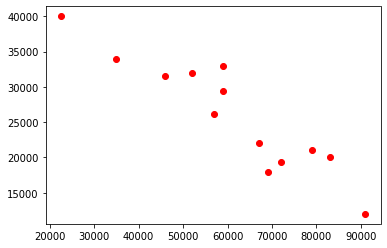

In [5]:
#plt.scatter(df["Age(yrs)"],df["Sell Price ($)"],color="green")
plt.scatter(df["Mileage"],df["Sell Price ($)"],color="red")

In [6]:
dummy=pd.get_dummies(df["Car Model"])
dummy

,Mercedes Benz C class,Audi A5,BMW X5
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,1,0,0


In [7]:
new=pd.concat([df,dummy],axis="columns")
new

,Car Model,Mileage,Sell Price ($),Age(yrs),Mercedes Benz C class,Audi A5,BMW X5
0,BMW X5,69000,18000,6,0,0,1
1,BMW X5,35000,34000,3,0,0,1
2,BMW X5,57000,26100,5,0,0,1
3,BMW X5,22500,40000,2,0,0,1
4,BMW X5,46000,31500,4,0,0,1
5,Audi A5,59000,29400,5,0,1,0
6,Audi A5,52000,32000,5,0,1,0
7,Audi A5,72000,19300,6,0,1,0
8,Audi A5,91000,12000,8,0,1,0
9,Mercedes Benz C class,67000,22000,6,1,0,0


In [20]:
new.columns

Index(['Car Model', 'Mileage', 'Sell Price ($)', 'Age(yrs)',
       ' Mercedes Benz C class', 'Audi A5', 'BMW X5'],
      dtype='object')

In [27]:
final=new.drop(["Car Model","BMW X5"],axis="columns")
final

,Mileage,Sell Price ($),Age(yrs),Mercedes Benz C class,Audi A5
0,69000,18000,6,0,0
1,35000,34000,3,0,0
2,57000,26100,5,0,0
3,22500,40000,2,0,0
4,46000,31500,4,0,0
5,59000,29400,5,0,1
6,52000,32000,5,0,1
7,72000,19300,6,0,1
8,91000,12000,8,0,1
9,67000,22000,6,1,0


In [33]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [36]:
x=final.drop(["Sell Price ($)"],axis="columns")
x

,Mileage,Age(yrs),Mercedes Benz C class,Audi A5
0,69000,6,0,0
1,35000,3,0,0
2,57000,5,0,0
3,22500,2,0,0
4,46000,4,0,0
5,59000,5,0,1
6,52000,5,0,1
7,72000,6,0,1
8,91000,8,0,1
9,67000,6,1,0


In [39]:
y=final["Sell Price ($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price ($), dtype: int64

In [40]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
reg.predict([[45000,4,1,0]])

array([36991.31721031])

In [43]:
reg.score(x,y)

0.9417050937281082